In [1]:
#importing liberaries

import numpy as np 
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
centers = [[1,1], [2,2], [3,3]]
X, _ =make_blobs(n_samples = 10000, centers = centers, cluster_std = 0.3)
bandwidth = estimate_bandwidth(X, quantile = 0.2, n_samples = 1000)


ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(X)

MeanShift(bandwidth=0.5604526221624988, bin_seeding=True)

In [3]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("numbers of estimated clusters : %d" % n_clusters_)

numbers of estimated clusters : 3


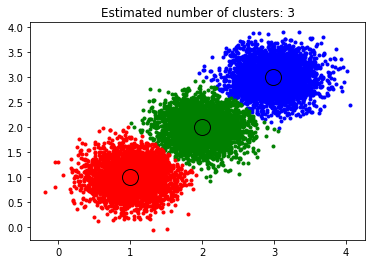

In [4]:
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k 
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 16)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()